In [1]:
import random as rd
import numpy as np
import math as mt
import cmath as cmt
from matplotlib import pylab as plt

In [2]:
tmax  = 100
vtime = np.arange(0,tmax+1,1)


##   coin=0: KEMPE    coin=1: HADAMARD
coin = 1

# For the coin operator
thetDeg = 45
theta    = mt.radians( thetDeg ) 

# IC over the Bloch sphere
phiDeg   = (1-coin)*0 + coin*90   # Symmetric IC:  coin=0:  phiDeg=90 (KEMPE)    coin=1: phiDeg=90 (HADAMARD)
phiBloch = mt.radians(phiDeg)

gamDeg  = 90
gamBloch = mt.radians( gamDeg )

In [3]:
##   coin=0: KEMPE    coin=1: HADAMARD
c11 = ( (1-coin)*(1 )  +  coin*( 1) ) * np.cos(theta)
c12 = ( (1-coin)*(1j)  +  coin*( 1) ) * np.sin(theta)
c21 = ( (1-coin)*(1j)  +  coin*( 1) ) * np.sin(theta)
c22 = ( (1-coin)*(1 )  +  coin*(-1) ) * np.cos(theta)

In [4]:
# Compute the components of An|0> + Bn|1>
def recursive_qw_dx_A_B():

  veci   = range(dx,npos-dx,1) 
  vecAA1 =  c11*vecA1[ veci - dx ] + c12*vecB1[ veci - dx ] 
  vecBB1 =  c21*vecA1[ veci + dx ] + c22*vecB1[ veci + dx ] 
 
  # Right/Left boundaries
  vecAA1 = np.concatenate( (np.zeros(dx),vecAA1,np.zeros(dx)), axis=None)
  vecBB1 = np.concatenate( (np.zeros(dx),vecBB1,np.zeros(dx)), axis=None)

  return vecAA1,vecBB1

def recursive_CW(): # classical walk
  veci    = np.arange(dx,npos-dx,1)
  vpCW2 = 0.5*vpCW[veci-dx] +  0.5*vpCW[veci+dx]
  vpCW3 = np.concatenate( (np.zeros(dx),vpCW2,np.zeros(dx)), axis=None)
  
  return vpCW3

In [5]:
# Now we set all sep lengtht with dx=1, but later we ca use different dx at each time
vdx   = np.asarray(  1*np.ones( len(vtime) ) , dtype=int)
sumdx = np.sum(vdx) 

xpos = np.arange(-int(sumdx)-1, int(sumdx)+2, 1) # [-L-2,...,L+2], to avoid Boundary issues we use plus/minus 2 
npos = len(xpos)
xc   = xpos.size//2      # central position = L   #Index Start at 0 #print(" xc:",xc,xpos[xc])    

vecA1 = np.zeros(len(xpos), dtype=np.complex_)   
vecB1 = np.zeros(len(xpos), dtype=np.complex_)    
vpCW  = np.zeros(len(xpos), dtype=float      ) # for the Classical Walk

In [6]:
vpCW[xc] = 1.0
  
vecA1[xc]  = np.cos(gamBloch/2)                       
vecB1[xc]  = np.sin(gamBloch/2) * np.exp(1j*phiBloch) 

vpQW = abs(vecA1)**2 + abs(vecB1)**2

In [7]:
listSumP  = [ np.sum( vpQW ) ]
listX1_qw = [  np.sum( vpQW*xpos ) ]
listX1_cw = [  np.sum( vpCW*xpos ) ]
listX2_qw = [  np.sum( vpQW*(xpos**2) ) ]
listX2_cw = [  np.sum( vpCW*(xpos**2) ) ]

#--------------------------------   dinamics: BEGIN    -------------------------------#
for t in np.arange(1,len(vtime),1):    
  
        # Quantum walk
        dx = vdx[t]    
        vecA1, vecB1 = recursive_qw_dx_A_B()
 
        # Computing coin components prob
        vpQW = abs(vecA1)**2 + abs(vecB1)**2
        listSumP.append(  np.sum(vpQW) ) 

        # Classical walk
        vpCW = recursive_CW()

        
        # Computing the statistical moments
        listX1_qw.append(  np.sum( vpQW*xpos ) )
        listX1_cw.append(  np.sum( vpCW*xpos ) )

        listX2_qw.append(  np.sum( vpQW*(xpos**2) ) )        
        listX2_cw.append(  np.sum( vpCW*(xpos**2) ) )

vSumP  = np.asarray(listSumP)
vX1_qw = np.asarray(listX1_qw)
vX1_cw = np.asarray(listX1_cw)
vX2_qw = np.asarray(listX2_qw)
vX2_cw = np.asarray(listX2_cw)

sd_qw = np.sqrt( vX2_qw - vX1_qw**2 )
sd_cw = np.sqrt( vX2_cw - vX1_cw**2 )

print(  vSumP )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


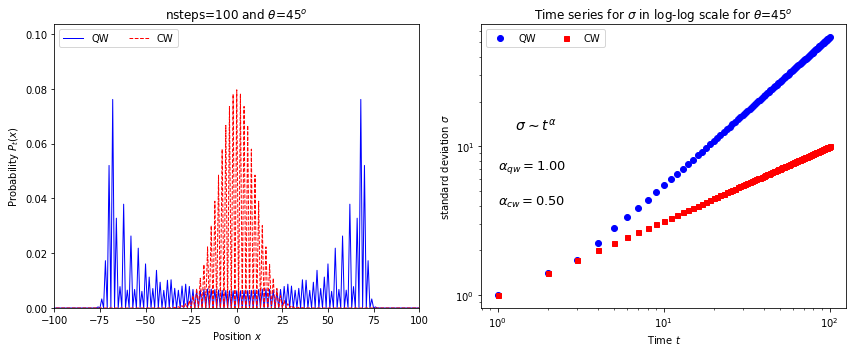

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  #nrows, ncols, index

pltqw = plt.plot(xpos,vpQW, 'b-',  linewidth=1, label='QW')
pltcw = plt.plot(xpos,vpCW, 'r--', linewidth=1, label='CW')

plt.xlim(-tmax,tmax)
plt.ylim( 0,1.3*np.max(vpCW))
plt.xlabel(r'Position $x$')
plt.ylabel(r'Probability $P_t(x)$')
plt.title( r'nsteps=%d and $\theta$=%d$^o$ '%(tmax,thetDeg))
plt.legend(ncol=2,loc="upper left")


plt.subplot(1, 2, 2)  #nrows, ncols, index
plt.loglog(vtime,sd_qw, 'bo', markersize=6, label='QW')
plt.loglog(vtime,sd_cw, 'rs', markersize=5, label='CW')
plt.xlabel(r'Time $t$')
plt.ylabel(r'standard deviation $\sigma$')
plt.title( r'Time series for $\sigma$ in log-log scale for $\theta$=%d$^o$ '%(thetDeg) )
plt.legend(ncol=2,loc="upper left")

x = vtime[range(50,tmax,1)]  ; y = sd_cw[range(50,tmax,1)]
coeffs_cw = np.polyfit(np.log(x), np.log(y), deg=1)

x = vtime[range(50,tmax,1)]  ; y = sd_qw[range(50,tmax,1)]
coeffs_qw = np.polyfit(np.log(x), np.log(y), deg=1)


plt.text(1,13,r'    $\sigma\sim t^\alpha$', fontsize=14)
plt.text(1,7,r'$\alpha_{qw}=$%1.2f'%(coeffs_qw[0]) , fontsize=13)
plt.text(1,4,r'$\alpha_{cw}=$%1.2f'%(coeffs_cw[0]) , fontsize=13)

plt.tight_layout()